In [1]:
# packages
import os
from hsML import Hamiltonian, h, c, mu_me
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# construct matrix
n_min = 5
n_max = 6
S = 1
ham0 = Hamiltonian(n_min=n_min, n_max=n_max, S=S)
print('Number of basis states:', '%d'%ham0.num_states)

Number of basis states: 61


In [11]:
# calculate Stark map
Bfield=0.0
field_angle=90.0
Efield = np.linspace(0.0, 6.0*10**5, 101) # V /cm
sm0 = ham0.stark_map(Efield*1e2, Bfield=Bfield, 
                     field_angle=field_angle, 
                     cache_matrices=False,
                     load_matrices=False,
                     save_matrices=True,
                     matrices_dir='saved_matrices')

diagonalise Hamiltonian: 100%|██████████| 101/101 [00:00<00:00, 2577.76it/s]

Saved 'stark' matrix from, 
	 ./saved_matrices/stark_n=5-6_L_max=None_S=1_ML=None_ML_max=None_angle=90.0


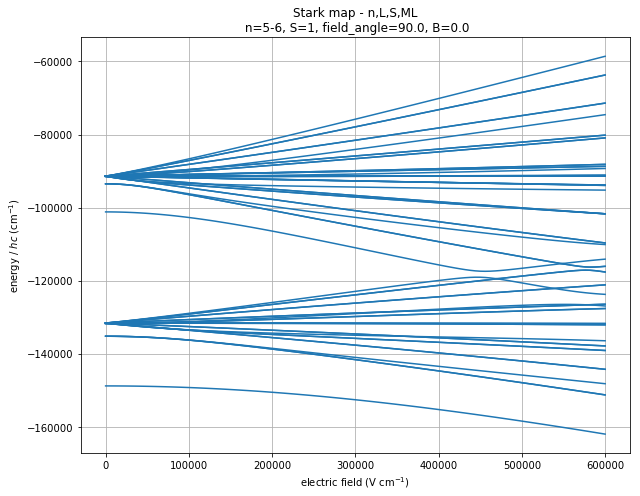

In [14]:
plt.figure(figsize=(9, 7))

indexes = range(ham0.num_states)
for ix in indexes:
    plt.plot(Efield, sm0[:, ix] / (h*mu_me*10**9), ls='-', c='tab:blue')

# format
plt.xlabel('electric field (V cm$^{-1}$)')
plt.ylabel('energy / $h c$ (cm$^{-1}$)')

# output
plt.grid()
plt.title('Stark map - n,L,S,ML\n n={}-{}, S={}, field_angle={}, B={}'.format(
            n_min, n_max, S, field_angle, Bfield))
plt.tight_layout()